In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [2]:
# make_moons is the classic dataset for this problem
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf')) # 'rbf' is the default and most powerful
])

In [4]:
#hyper-parameter tuning 
# We will search for the best 'C' and 'gamma'
param_grid = {
    'svc__C': [0.1, 1, 10, 100],            # The regularization penalty
    'svc__gamma': [10, 1, 0.1, 0.01]       # The 'rbf' kernel influence
}

In [5]:
print("Starting GridSearchCV...")
grid_search = GridSearchCV(
    pipe_svm,
    param_grid,
    cv=5,
    verbose=1,
    scoring='accuracy'
)

Starting GridSearchCV...


In [6]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [10, 1, 0.1, 0.01]},
             scoring='accuracy', verbose=1)

In [7]:
print("\n--- Grid Search Results ---")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

#Get the single best model
best_svm = grid_search.best_estimator_

#Evaluate on the Final Test Set
test_accuracy = best_svm.score(X_test, y_test)
print(f"\nFinal Test Set Accuracy: {test_accuracy:.4f}")


--- Grid Search Results ---
Best parameters found: {'svc__C': 1, 'svc__gamma': 1}
Best cross-validation accuracy: 0.9786

Final Test Set Accuracy: 0.9667


In [8]:
def plot_decision_boundary(model, X, y):  #visualising the results
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM Decision Boundary (Best Model)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

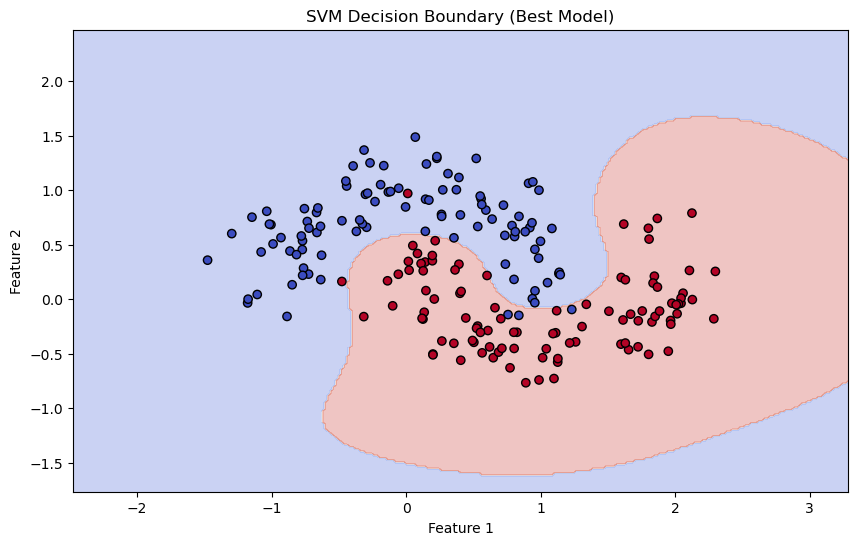

In [9]:
plot_decision_boundary(best_svm, X, y)